Creating a Forward Prop network

https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ann_class/forwardprop.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Create 500 samples per class

Nclass = 500

Generate some gausian clouds

Use Randn to return a sample (or samples) from the “standard normal” distribution.

The "+ np.array([0,-2])" takes each element and centers it around each respective element. For example the first column in X1
is centered around "0" and the second column is centered around "-2"

In [33]:
#Generate some gausian clouds

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])

X = np.vstack([X1, X2, X3])

In [4]:
#Create some labels

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)


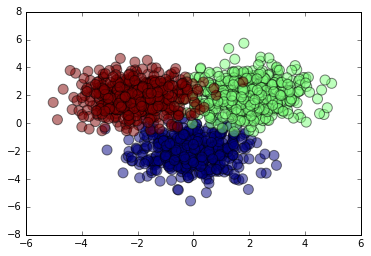

In [34]:
#Visualize Data

plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [6]:
#Randomly initialize some weights

D = 2 #Dimensionality of input (# of features)
M = 3 #Hidden layer size
K = 3 #Number of classes (outputs)

W1 = np.random.rand(D,M)
b1 = np.random.rand(M)
W2 = np.random.rand(M,K)
b2 = np.random.rand(K) 

In [18]:
#Define the forward action (2:40)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-(X.dot(W1)+b1))) # Z = value at hidden layer
    
    #Now for softmax for next layer
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims=True)
    return Y

In [21]:
#Define a function to calculate the classification rate

def classification_rate(Y, P): #Takes in Targets "Y" and Predictions "P"
    n_correct = 0 #just to initialize
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct)/ n_total        


Argmax = maximum of argument. In axis 1 we are looking at each row. 

In [29]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis = 1) #Predictions

With Assert you're telling the program to test that condition, and trigger an error if the condition is false.

In [30]:
assert(len(P)==len(Y))

In [31]:
print "Classification rate for randomly chosen weights:", classification_rate(Y, P)

Classification rate for randomly chosen weights: 0.333333333333


Returns exactly as expected. The correct classification is 33%

In [26]:
P.shape

(1500L,)

In [27]:
P_Y_given_X

array([[ 0.31249094,  0.34603897,  0.34147009],
       [ 0.31516254,  0.36888354,  0.31595391],
       [ 0.31322572,  0.35159961,  0.33517467],
       ..., 
       [ 0.29931818,  0.27921177,  0.42147005],
       [ 0.30096574,  0.28625977,  0.41277449],
       [ 0.30043489,  0.28484262,  0.4147225 ]])

In [20]:
Y.shape

(1500L,)

In [8]:
np.array([0,-2])

array([ 0, -2])

In [35]:
X1

array([[ -1.13964759e+00,  -2.21557182e+00],
       [ -1.75001243e+00,  -1.31970768e+00],
       [  1.44037693e+00,  -8.76023601e-01],
       [ -8.34816877e-01,  -3.24327257e+00],
       [ -4.08096383e-01,  -2.02382108e+00],
       [  2.95442379e-01,  -1.89481951e+00],
       [  9.08074979e-01,  -3.06530022e+00],
       [  5.87073235e-01,  -1.58597771e+00],
       [  3.56391182e-01,  -2.60054474e+00],
       [ -1.93210675e+00,  -1.00756306e+00],
       [ -1.99841286e+00,  -1.92327830e+00],
       [  1.19596979e-01,  -6.41265677e-02],
       [ -5.76962708e-01,  -3.40214232e-01],
       [  6.21393861e-01,  -1.66856485e+00],
       [  1.41446440e+00,  -2.26751181e+00],
       [  1.66968688e+00,  -9.31070257e-01],
       [ -5.41435203e-01,  -1.81396110e+00],
       [  5.58398251e-01,  -2.35756374e+00],
       [ -1.65260940e+00,  -9.83662794e-01],
       [ -5.86340247e-01,  -2.79911447e-01],
       [  9.15375901e-01,  -3.45746513e+00],
       [  1.92630061e+00,  -1.57230518e+00],
       [  

In [10]:
X1

array([[  9.41430395e-01,  -1.17051308e+00],
       [  4.85364683e-01,  -1.58938098e+00],
       [  9.03454372e-01,  -1.30906473e+00],
       [  3.80485372e-01,  -1.07158652e+00],
       [  1.33989400e-01,  -1.92140578e+00],
       [  9.95750070e-01,  -1.35544915e+00],
       [  1.31603420e-02,  -1.28187812e+00],
       [  9.54998086e-02,  -1.77774256e+00],
       [  8.66502710e-01,  -1.44839666e+00],
       [  3.85125632e-01,  -1.49989123e+00],
       [  6.64528889e-01,  -1.34809196e+00],
       [  2.81657350e-01,  -1.11818399e+00],
       [  3.15427269e-02,  -1.10135987e+00],
       [  5.07449720e-01,  -1.24591513e+00],
       [  7.38446243e-01,  -1.66971788e+00],
       [  6.77269211e-02,  -1.97764508e+00],
       [  4.45531582e-01,  -1.71780941e+00],
       [  5.37552483e-01,  -1.24415471e+00],
       [  9.75630161e-01,  -1.56885257e+00],
       [  3.79564461e-01,  -1.57661952e+00],
       [  2.27701685e-01,  -1.01583448e+00],
       [  8.18828434e-01,  -1.95057765e+00],
       [  

In [11]:
X

array([[ 0.94143039, -1.17051308],
       [ 0.48536468, -1.58938098],
       [ 0.90345437, -1.30906473],
       ..., 
       [-1.27939899,  2.64101137],
       [-1.22611341,  2.171656  ],
       [-1.83406849,  2.52318764]])

In [15]:
-X.dot(W1)-b1

array([[-0.1894649 ,  0.36113237, -0.33511208],
       [ 0.56051941,  0.96016567,  0.03584397],
       [-0.02809564,  0.49259503, -0.27521932],
       ..., 
       [-2.120291  , -1.32626491, -0.16567204],
       [-1.71338945, -0.98840031, -0.06401475],
       [-1.58180424, -0.90587792,  0.17593053]])

In [28]:
P

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)